In [ ]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Admission_Predict.csv',skiprows=0,delimiter=",")
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1    

In [ ]:
X = df[["CGPA",'GRE Score']]
y = df[["Chance of Admit "]]
print(X)
print(y)

     CGPA  GRE Score
0    9.65        337
1    8.87        324
2    8.00        316
3    8.67        322
4    8.21        314
..    ...        ...
395  9.04        324
396  9.11        325
397  9.45        330
398  8.78        312
399  9.66        333

[400 rows x 2 columns]
     Chance of Admit 
0                0.92
1                0.76
2                0.72
3                0.80
4                0.65
..                ...
395              0.82
396              0.84
397              0.91
398              0.67
399              0.95

[400 rows x 1 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [ ]:
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
print(X_train_norm)
print(X_test_norm)
print(X_train_std)
print(X_test_std)

[[0.3974359  0.22      ]
 [0.51282051 0.7       ]
 [0.63782051 0.68      ]
 [0.47115385 0.56      ]
 [0.63461538 0.44      ]
 [0.49038462 0.4       ]
 [0.50320513 0.34      ]
 [0.73717949 0.76      ]
 [0.48076923 0.42      ]
 [0.88461538 0.9       ]
 [0.53846154 0.5       ]
 [0.3974359  0.44      ]
 [0.38461538 0.58      ]
 [0.50320513 0.4       ]
 [0.49358974 0.6       ]
 [0.45512821 0.32      ]
 [0.56410256 0.48      ]
 [0.42628205 0.3       ]
 [0.20192308 0.14      ]
 [0.38461538 0.32      ]
 [0.62179487 0.6       ]
 [0.66346154 0.68      ]
 [0.80769231 0.66      ]
 [0.21153846 0.        ]
 [0.82051282 0.84      ]
 [0.74358974 0.62      ]
 [0.38461538 0.24      ]
 [0.54487179 0.5       ]
 [0.2724359  0.5       ]
 [0.63782051 0.58      ]
 [0.56410256 0.52      ]
 [0.54487179 0.46      ]
 [0.32051282 0.12      ]
 [0.2724359  0.26      ]
 [0.84294872 0.88      ]
 [0.44871795 0.34      ]
 [0.55769231 0.58      ]
 [0.73717949 0.72      ]
 [0.34615385 0.22      ]
 [0.51923077 0.3       ]


In [ ]:
lm = neighbors.KNeighborsRegressor(n_neighbors=5)
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)#Not needed here
print("R2=",lm.score(X_test,y_test))

lm.fit(X_train_norm, y_train)
#predictions2 = lm.predict(X_test_norm)
print("R2 (norm)=",lm.score(X_test_norm,y_test))

lm.fit(X_train_std, y_train)
#predictions3 = lm.predict(X_test_std)
print("R2 (std)=",lm.score(X_test_std,y_test))

R2= 0.7509928259756933
R2 (norm)= 0.7523599677299028
R2 (std)= 0.8090489285228912


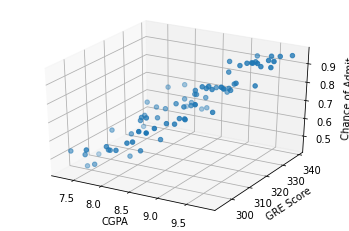

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(X_test[['CGPA']]),np.array(X_test[['GRE Score']]),predictions)
ax.set_xlabel('CGPA')
ax.set_ylabel('GRE Score')
ax.set_zlabel('Chance of Admit')
plt.show()